<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## 01. Loading and Viewing FITS images I
### About this notebook

In this worksheet we use the `astropy` package to read a .fits file and visualize an astronomical image.

---

In this notebook we will use a .fits image of the Horse Head Nebula obtained from

http://data.astropy.org/tutorials/FITS-images/HorseHead.fits

For a detalied description of working with .fits files using `astropy`, go to

http://docs.astropy.org/en/stable/io/fits/index.html

---

### Open and Close a .fits file

The first task is to read one of these files using the function `fits.open()` from the `astropy.io` package. The `open` function returns adn object called HDUList  and therefore it is assigned to the variable `hdul`. This is a list-like collecion of HDU (Header Data Unit) objects.

In [ ]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
%matplotlib inline

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/02. Astrophysics Data/presentation/05.FITSImage01/'

In [ ]:
hdul = fits.open(path+'HorseHead.fits')

The method `.info()` returns a summary of the content of the FITS file.

In [ ]:
hdul.info()

Filename: /content/drive/MyDrive/Colab Notebooks/CA2021/02. Astrophysics Data/presentation/05.FITSImage01/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


There can be many extensions dentoed by `hdul[0]`, `hdul[1]`, etc. The first one, `hdul[0]`, is called the PRIMARY extension. There is also another type of information as the number of cards and the dimensions of the data table.  

Since we open the file to extract and assign the information, it is recommendable to close the file:

In [ ]:
hdul.close()

Using the context manager, we have a better way to open the file and close it immediately. 

In [ ]:
with fits.open(path+'HorseHead.fits') as hdul:
    hdul.info()

Filename: /content/drive/MyDrive/Colab Notebooks/CA2021/02. Astrophysics Data/presentation/05.FITSImage01/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### Headers and Data

Each HDU object has a `.header` and a `.data` attributes. Using the method `header` of `astropy` it is possible to see the header of each HDU object. For example:

In [ ]:
hdul[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

There is a lot of information as, for example, ORIGIN, DATE, RA, DEC, TELESCOPE, FILTER, etc. To access one of these items we use

In [ ]:
hdul[0].header['FILTER']

'OG590'

On the other hand, the method `data` from `astropy` gives access to the data of each HDU object. For example, we assign the data in the above FITS file to the variable image_data.

**Note: It is important to assign this information before closing the .fits file!**

In [ ]:
hdul = fits.open(path+'HorseHead.fits')
image_data = hdul[0].data
hdul.close()

The information is stored in a numpy array:

In [ ]:
type(image_data)

numpy.ndarray

The shape of the array is easily obtained:

In [ ]:
image_data.shape

(893, 891)

The values in the array can be shown explicitly. For example,

In [ ]:
image_data[10:15 , 20:30]

array([[7809, 7670, 7670, 7460, 7180, 6761, 6761, 6901, 7180, 7041],
       [7565, 7285, 7565, 7425, 7425, 7285, 7285, 7250, 7250, 7390],
       [7006, 7285, 7006, 6866, 7425, 7285, 7285, 7530, 7530, 7670],
       [6866, 7425, 7146, 7146, 7705, 7285, 7285, 7670, 7670, 7390],
       [7146, 7146, 6866, 7146, 7705, 7285, 6726, 7111, 7670, 7390]],
      dtype=int16)

We can also show some important values such as the minimum, the maximum, the mean value, etc.

In [ ]:
np.min(image_data)

3759

In [ ]:
np.max(image_data)

22918

In [ ]:
np.mean(image_data)

9831.481676287574

### Visualizing the Image

We will use the `matplotlib.pyplot` function `imshow` to visualize the data in the fits file. For detailed information go to

http://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html


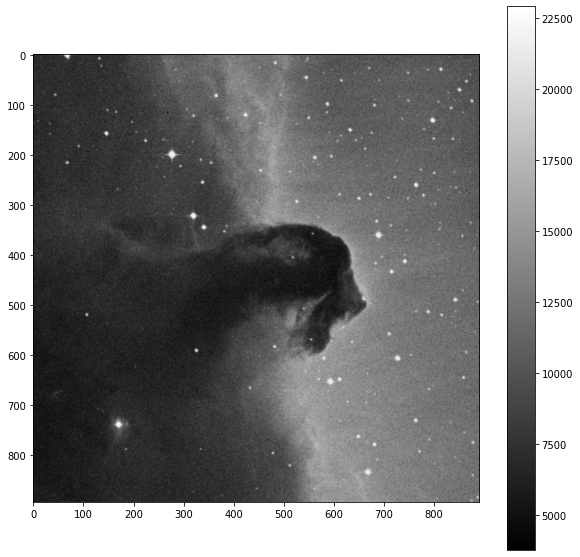

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

We can change the 'gray' color map. For information about color maps go to

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

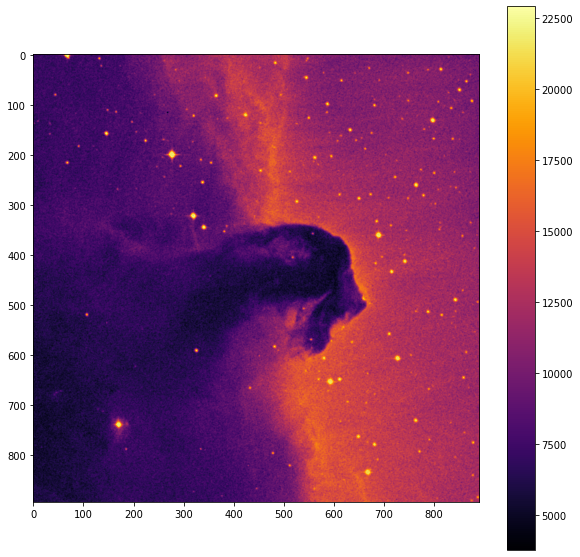

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='inferno')
plt.colorbar()
plt.show()

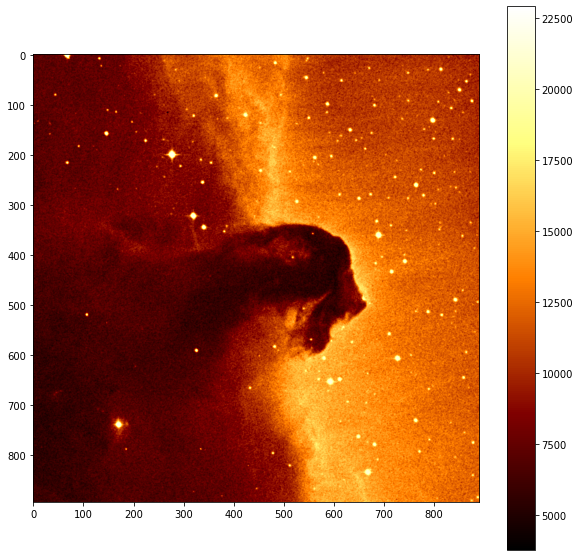

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot')
plt.colorbar()
plt.show()

Or we can use a logarithmic color scale by using the function `LogNorm` from `matplotlib.colors`. 

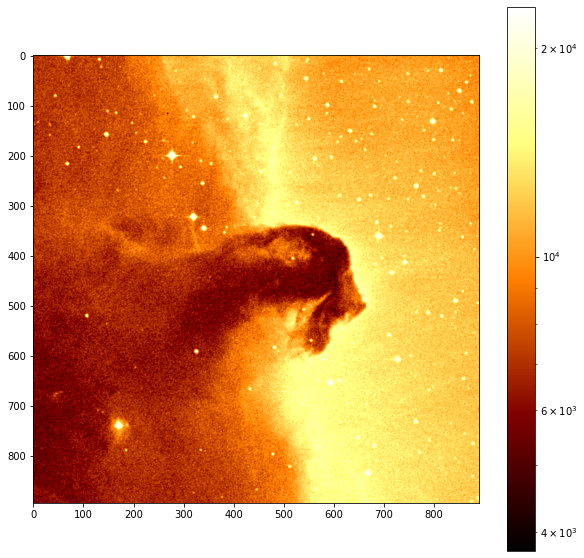

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot', norm=LogNorm())
plt.colorbar()
plt.show()

### Histogram Plot

The data in the 2D array can be flattened,

In [ ]:
flat_data = image_data.flatten()

and we can make a histogram with this data easily. More information in 

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

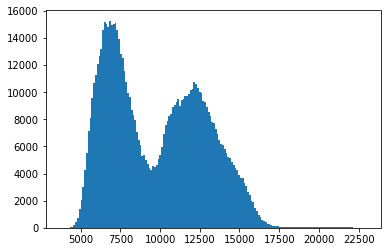

In [ ]:
plt.hist(flat_data, bins='auto') 
plt.show()

This histogram let us consider to plot the image using only data points in some range of values to improve the visualization

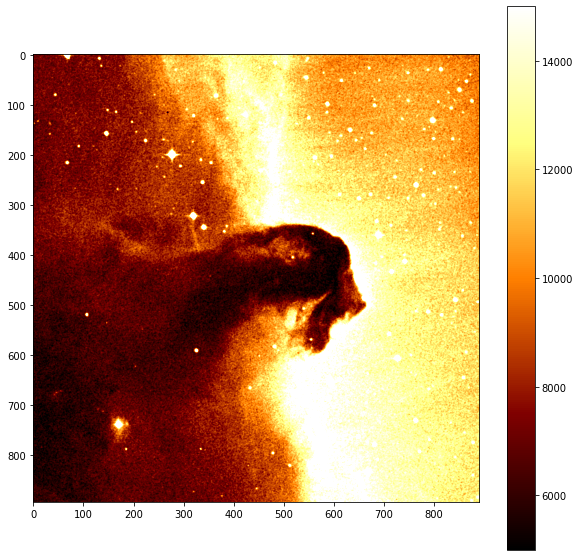

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot', vmin=5E3, vmax=1.5E4)
plt.colorbar()
plt.show()